## Proyecto Peleas UFC

### Unidades de observación 
Las peleas de los diferentes eventos realizados por UFC desde 1994 hasta 2021

### Unidad de análisis
Análitica y descriptiva principalmente, aunque también se busca ver las posibilidades de una unidad predictiva (digamos para crear un modelo predictivo de resultados)
### Justificación de datos
Nuestros datos longitudinales ya que tienen "resultados repetitivos" a lo largo del tiempo  
También porque en varias ocasiones a los sujetos les aplican las mismas mediciones

### clasificación de variables/columnas

FIGHT_ID – Nominal  
EVENT_ID – Nominal  
FIGHT_NAME – Nominal  
FIGHT_WEIGHTCLASS – Nominal  
FIGHT_METHOD – Nominal  
ROUND – Ordinal  
TIME – Intervalo  
FIGHT_TIME_FORMAT – Nominal  
FIGHT_REFEREE – Nominal  
FIGHT_DETAILS – Nominal  
MINUTE - Razón  
SECOND - Razón  
DATE_YMD - Intervalo
EVENT_DATE - Intervalo
FIGHT_STUB, EVENT_NAME, EVENT_LOCATION, EVENT_STUB, URL – Nominal  
FIGHT_WINNER – Nominal 

## Alta - Baja Cardinalidad (Nominales)

FIGHT - Alta

EVENT - Alta 

FightWeight - Baja

FightMethod - Alta

FightTimeFormat - Baja

Fight_Referee - Baja

Fight_Details - Alta

Fight_Winner - Alta

FIGHT_STUB EVENT_NAME, EVENT_DATE, EVENT_LOCATION, EVENT_STUB, DATE_YMD, URL – Alta 

FIGHT_WINNER – Alta

## Categoricos balanceados
Round

## Categoricos no balanceados
FIGHT_ID   
EVENT_ID 
FIGHT_NAME
FIGHT_WEIGHTCLASS 
FIGHT_METHOD  
FIGHT_STUB, EVENT_NAME, EVENT_DATE, EVENT_LOCATION, EVENT_STUB, DATE_YMD, URL 
FIGHT_WINNER 

## Division de variables

Juan pedro

Horacio:  Analisis univariado de EVENT_DATE, EVENT_LOCATION, FIGHT_WINNER

Yaotecatl  
    EVENT_ID  
    FIGHT_NAME  
    FIGHT_WEIGHTCLASS  
    FIGHT_METHOD  
    ROUND


In [37]:
#Importacion de librerias
import numpy as np
import pandas as pd
pd.__version__
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime, timedelta, date
from ipywidgets import interact
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
!jupyter nbextension enable --py widgetsnbextension

'2.0.3'

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console contrib dejavu events execute kernel kernelspec
lab labextension labhub migrate nbconvert nbextensions_configurator notebook
qtconsole run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [38]:
df = pd.read_csv('ufc-fight-metadata.csv', encoding='utf-8')

In [39]:
df_backup = df.copy()
# df

In [40]:
# Lista de nombres de columnas
col = df.columns
# col

In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6662 entries, 0 to 6661
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FIGHT_ID           6662 non-null   int64 
 1   EVENT_ID           6662 non-null   int64 
 2   FIGHT_NAME         6662 non-null   object
 3   FIGHT_WEIGHTCLASS  6662 non-null   object
 4   FIGHT_METHOD       6662 non-null   object
 5   ROUND              6662 non-null   int64 
 6   TIME               6662 non-null   object
 7   FIGHT_TIME_FORMAT  6662 non-null   object
 8   FIGHT_REFEREE      6662 non-null   object
 9   FIGHT_DETAILS      6662 non-null   object
 10  MINUTE             6662 non-null   int64 
 11  SECOND             6662 non-null   int64 
 12  FIGHT_STUB         6662 non-null   object
 13  EVENT_NAME         6662 non-null   object
 14  EVENT_DATE         6662 non-null   object
 15  EVENT_LOCATION     6662 non-null   object
 16  EVENT_STUB         6662 non-null   object


In [42]:
nominales = ['FIGHT_ID', 'EVENT_ID', 'FIGHT_NAME','FIGHT_METHOD','FIGHT_DETAILS','FIGHT_STUB','EVENT_NAME','EVENT_LOCATION','EVENT_STUB','URL','FIGHT_WINNER']
nominales_baja_cardinalidad = ['FIGHT_WEIGHTCLASS', 'FIGHT_TIME_FORMAT', 'FIGHT_REFEREE']
ordinales = ['ROUND'] 
intervalo = ['TIME','EVENT_DATE','DATE_YMD']
razon = ['MINUTE', 'SECOND']

In [43]:
for i in nominales_baja_cardinalidad:
    df[i] = df[i].astype('category')    

In [44]:
for i in nominales_baja_cardinalidad + ordinales:
    print(i)
    df[i].unique()
    print()    

FIGHT_WEIGHTCLASS


['Light Heavyweight', 'Featherweight', 'Women&#039;s Featherweight', 'Women&#039;s Flyweight', 'Women&#039;s Bantamweight', ..., 'Ultimate Fighter 4 Welterweight Tournament Ti..., 'Ultimate Fighter 2 Heavyweight Tournament Title', 'Ultimate Fighter 1 Light Heavyweight Tourname..., 'UFC Interim Flyweight Title', 'Ultimate Fighter Latin America 2 Welterweight...]
Length: 109
Categories (109, object): ['Bantamweight', 'Catch Weight', 'Featherweight', 'Flyweight', ..., 'Women&#039;s Bantamweight', 'Women&#039;s Featherweight', 'Women&#039;s Flyweight', 'Women&#039;s Strawweight']


FIGHT_TIME_FORMAT


['3 Rnd (5-5-5)', '5 Rnd (5-5-5-5-5)', '3 Rnd + OT (5-5-5-5)', '1 Rnd + OT (12-3)', '1 Rnd (20)', ..., '1 Rnd + OT (30-3)', '1 Rnd (30)', '1 Rnd + OT (31-5)', 'No Time Limit', '1 Rnd (12)']
Length: 19
Categories (19, object): ['1 Rnd (10)', '1 Rnd (12)', '1 Rnd (15)', '1 Rnd (18)', ..., '3 Rnd (5-5-5)', '3 Rnd + OT (5-5-5-5)', '5 Rnd (5-5-5-5-5)', 'No Time Limit']


FIGHT_REFEREE


['Yves Lavigne', 'Wolf Menninger', 'Will Fisher', 'Wernei Cardoso', 'Wayne Spinola', ..., 'Al Wichgers', 'Al Guinee', 'Al Coley', 'Adam Martinez', 'Adam Cheadle']
Length: 208
Categories (208, object): ['Adam Cheadle', 'Adam Martinez', 'Al Coley', 'Al Guinee', ..., 'Wernei Cardoso', 'Will Fisher', 'Wolf Menninger', 'Yves Lavigne']


ROUND


array([3, 1, 2, 5, 4])

In [45]:
for i in nominales_baja_cardinalidad + ordinales:
    print(i)
    df[i].value_counts()
    print()

FIGHT_WEIGHTCLASS


FIGHT_WEIGHTCLASS
Lightweight                                           1119
Welterweight                                          1105
Middleweight                                           856
Featherweight                                          604
Heavyweight                                            571
                                                      ... 
Ultimate Fighter 15 Lightweight Tournament Title         1
Ultimate Fighter 14 Bantamweight Tournament Title        1
Ultimate Fighter 13 Welterweight Tournament Title        1
Ultimate Fighter 12 Lightweight Tournament Title         1
Ultimate Fighter 14 Featherweight Tournament Title       1
Name: count, Length: 109, dtype: int64


FIGHT_TIME_FORMAT


FIGHT_TIME_FORMAT
3 Rnd (5-5-5)           5866
5 Rnd (5-5-5-5-5)        578
1 Rnd + OT (12-3)         79
No Time Limit             29
3 Rnd + OT (5-5-5-5)      26
1 Rnd (20)                21
1 Rnd + 2OT (15-3-3)      20
2 Rnd (5-5)               13
1 Rnd (15)                 8
1 Rnd (10)                 6
1 Rnd (12)                 4
1 Rnd + OT (30-5)          3
1 Rnd (18)                 2
1 Rnd + OT (15-3)          2
1 Rnd + OT (27-3)          1
1 Rnd + OT (30-3)          1
1 Rnd + OT (31-5)          1
1 Rnd + 2OT (24-3-3)       1
1 Rnd (30)                 1
Name: count, dtype: int64


FIGHT_REFEREE


FIGHT_REFEREE
Herb Dean               998
John McCarthy           639
Dan Miragliotta         419
Mario Yamasaki          392
Marc Goddard            391
                       ... 
Tom Jones                 1
Ivan Svec                 1
Steven Davis              1
Brandon Pfannenstiel      1
Gabe Barahona             1
Name: count, Length: 208, dtype: int64


ROUND


ROUND
3    3353
1    1932
2    1102
5     237
4      38
Name: count, dtype: int64

In [46]:
#Comentario de la maestra
# ¿Qué concluyen de celdas este tipo de celdas?
#BORRAR
moda = df['ROUND'].mode().iloc[0]
median = df['ROUND'].median()
print(moda)
print(median)


3
3.0


In [47]:
df[razon].describe()

,MINUTE,SECOND
count,6662.000000,6662.000000
mean,3.508256,16.205194
std,1.835489,19.726635
min,0.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,3.000000
75%,5.000000,32.000000
max,18.000000,59.000000


In [48]:
df.TIME = df['TIME'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
# Calcula la mediana, moda y desviación estándar
median = df['TIME'].median()
mode = df['TIME'].mode()
std = df['TIME'].std()

# Calcula los cuartiles
q1 = df['TIME'].quantile(0.25)
q3 = df['TIME'].quantile(0.75)
iqr = q3 - q1
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std)
print("Interquartilic Range: ", iqr)



Median: 287.0
Mode: 0    300
Name: TIME, dtype: int64
Standard Deviation: 99.12629396653747
Interquartilic Range:  152.0


# Tomen de aqui lo que les sirva
Estadistica descriptiva de las columnas (Algunas omitidas como URL y STUBS)

TIME – Media: 287 - Moda: 300 - DE: 99.15009 - Rango Interquartilico: 152

FIGHT_TIME_FORMAT -Moda: 3RND (5-5-5)  

FIGHT_REFEREE – Moda: HERB DEAN

FIGHT_DETAILS – Moda: DECISION

MINUTE - Media: 4 - Moda: 5 - D.E: 1.83564 - RANGO INTERQUARTILICO: 32

SECOND - Media: 3 - Moda: no - D.E: 19.7326 - Rango: 32

EVENT_NAME - Moda: UFC 259: Blachowicz vs. Adesanya

EVENT_DATE - Moda: November 19,2016

EVENT_LOCATION - Moda: Las Vegas, Nevada, USA

DATE_YMD - Moda: 19/11/2016    

FIGHT_WINNER – Moda: DONALD CERRONE

Se realizó una limpieza de la columna FIGHT_WEIGHTCLASS porque algunos datos tenían pequeñas modificaciones que hacían que se contaran como una nueva categoría, como resultado de dicha limpieza se creó una nueva columna llamada GENDER que clasifica las peleas Female o Male

In [49]:
# Limpiamos la columna antes de dejar solo la categoria de peso
import re
def limpiar_categoria(categoria):
    cleaned_categoria = re.sub(r'[^a-zA-Z]', '', categoria)
    return cleaned_categoria.lower()  

df['FIGHT_WEIGHTCLASS'] = df['FIGHT_WEIGHTCLASS'].apply(limpiar_categoria)

In [50]:
# Creamos una columna separada con el genero de la pelea

def genderColumn(element):
    if 'women' in element:
        return 'female'
    else:
        return 'male'
    
df['GENDER'] = df['FIGHT_WEIGHTCLASS'].apply(genderColumn)

In [51]:
def limpiar_categoria(element):
    # Elimina caracteres especiales y espacios
    categories = ['strawweight','flyweight','bantamweight','featherweight','lightweight','welterweight','middleweight','heavyweight','lightheavyweight',
                  'heavyweight','openweight', 'ufctournamenttitle'] 
	
    for c in categories:
        if(c in element):
            element = c 
    
    return element  # Convierte a minúsculas

df['FIGHT_WEIGHTCLASS'] = df['FIGHT_WEIGHTCLASS'].apply(limpiar_categoria)

### Variable GENDER
Describe de manera simple el sexo de los peleadores, siendo estos dos posibles valores Male o Female

##### Interpretación
De manera esperada los combates masculinos dominan el porcentaje de apariciones quedandose con la moda, eso sí, yo esperaba cerca de un 15% de peleas femeniles pero la cifra real esta muy abajo.

([<matplotlib.patches.Wedge at 0x7f8dd0552080>,
 [Text(-1.0575561035218228, 0.3026137602683327, 'male'),
  Text(1.0575561035218228, -0.3026137602683323, 'female')],
 [Text(-0.576848783739176, 0.16506205105545418, '91%'),
  Text(0.576848783739176, -0.165062051055454, '9%')])

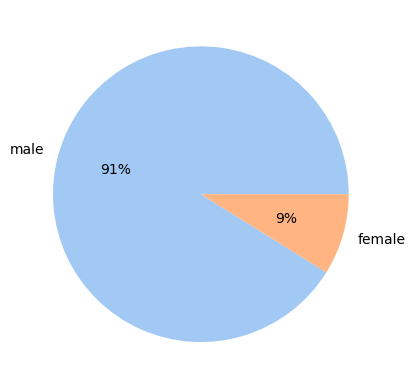

Moda:  0    male
Name: GENDER, dtype: object


In [52]:
porcentajes = df['GENDER'].value_counts(normalize=True)
color = sns.color_palette('pastel')[0:5]
plt.pie(porcentajes, labels=df['GENDER'].unique(),colors=color, autopct='%.0f%%')
plt.show()

moda = df['GENDER'].mode()
print("Moda: ", moda)

<Axes: xlabel='count'>

Text(0.5, 1.0, 'Peleas por genero')

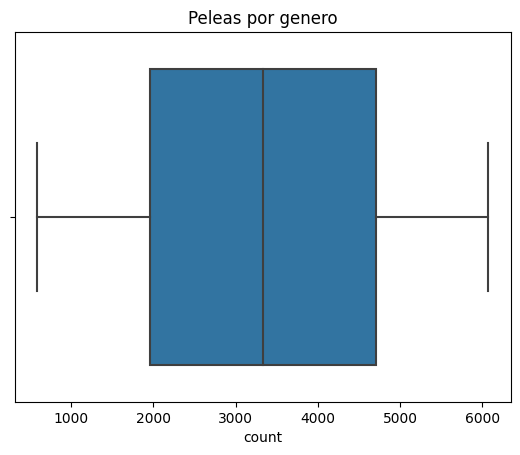

In [53]:
sns.boxplot(x = df['GENDER'].value_counts())
plt.title('Peleas por genero')


<Axes: xlabel='count'>

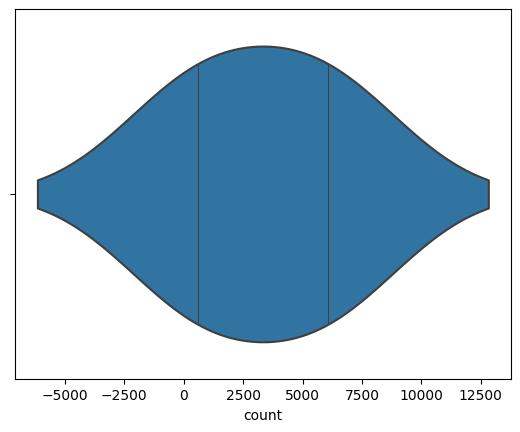

In [54]:
#La primer linea son las peleas de mujeres y la segunda la de hombres
sns.violinplot(x = df['GENDER'].value_counts(), inner="stick")


### Variable EVENT_ID
Event_id refiere a un indentificador único para cada evento realizado, dicho identificador es utilizado por cada pelea para referirse al evento al que pertenecen. Aprovechando esta relación podemos conocer qué eventos tienen la mayor cantidad de peleas y apoyandonos de otra columna, por ejemplo DATE_YMD, saber si hay alguna tendencia a reducir la cantidad de peleas por evento con el paso del tiempo

##### Interpretación
La primer gráfica nos muestra los eventos con más peleas y de ahí podemos ver que nunca ha habido un evento con más de 15 peleas, de ahí vemos que va bajando. Esto lo complementamos con la segunda gráfica que nos muestra los eventos con menos peleas, siendo 6 el minimo. Adelantando un poco al analisis bivariado cabe recalcar que 4 de los 8 eventos con 6 peleas se realizaron durante la pandemia.

Estos dos datos se podrían utilizar para realizar eventos que superen la media o realizando un análisis junto a los datos de audiencia ver qué tan rentable és realizar eventos con pocas o excesivas peleas. 

Finalmente, me gustaría agregar un par de datos a considerar, en este ultimo caso, para decidir la cantidad de peleas por evento, la tanto la moda y el promedio tienen valores muy similares moda:12 y promedio:10.85 (redondeamos a 11), por lo que salvo eventos especiales no consideramos una gran idea alejarse de esa cantidad de peleas.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='EVENT_ID'>

Text(0.5, 1.0, 'Top 10 eventos con mas peleas')

Text(0.5, 0, 'Event ID')

Text(0, 0.5, 'Numero de Peleas')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1718'),
  Text(1, 0, '1166'),
  Text(2, 0, '1136'),
  Text(3, 0, '1132'),
  Text(4, 0, '1268'),
  Text(5, 0, '1733'),
  Text(6, 0, '1727'),
  Text(7, 0, '1721'),
  Text(8, 0, '1138'),
  Text(9, 0, '1154')])

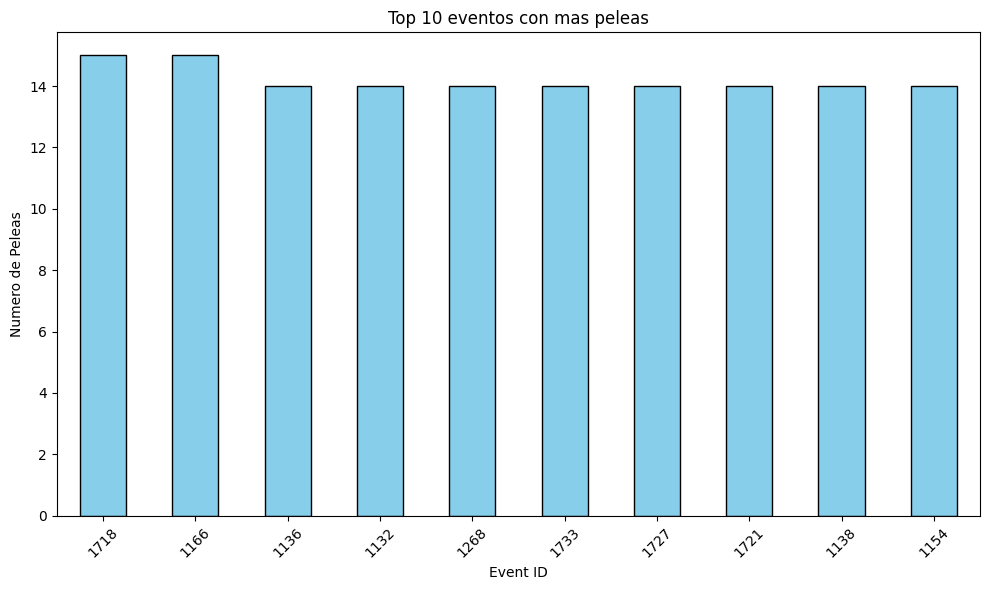

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='EVENT_ID'>

Text(0.5, 1.0, 'Top 10 eventos con menos peleas')

Text(0.5, 0, 'Event ID')

Text(0, 0.5, 'Numero de Peleas')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1176'),
  Text(1, 0, '1692'),
  Text(2, 0, '1694'),
  Text(3, 0, '1701'),
  Text(4, 0, '1717'),
  Text(5, 0, '1678'),
  Text(6, 0, '1691'),
  Text(7, 0, '1708'),
  Text(8, 0, '1726'),
  Text(9, 0, '1702')])

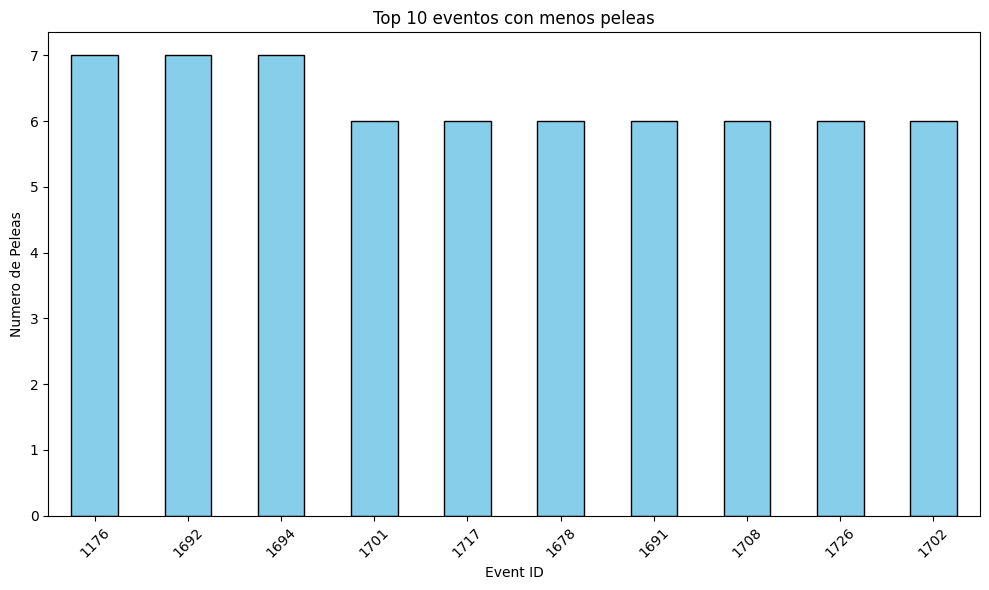

Promedio de eventos por pelea:  10.850162866449512
Moda en la cantidad de eventos:  0    12
Name: count, dtype: int64
Porcentajes de peleas por evento:  count
12    26.221498
11    23.615635
10    15.309446
13    11.889251
9      8.957655
8      6.840391
7      3.420195
14     2.280130
6      1.140065
15     0.325733
Name: proportion, dtype: float64


<Axes: xlabel='count'>

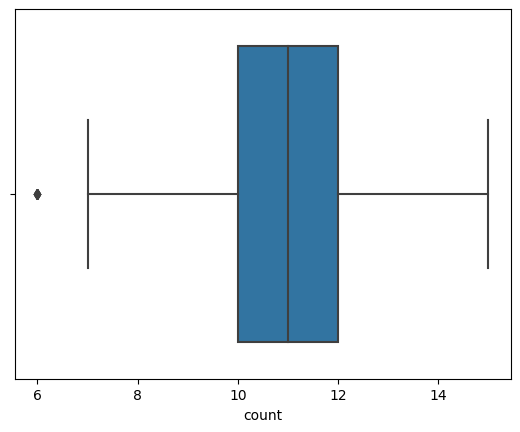

In [55]:
#Contamos cuantas veces aparece cada identificador
event_counts = df['EVENT_ID'].value_counts()

#Tomamos los primeros 10
top_10_events = event_counts.head(10)

#Con esos primeros 10 realizamos una gráfica de barras
plt.figure(figsize=(10, 6))
top_10_events.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 eventos con mas peleas')
plt.xlabel('Event ID')
plt.ylabel('Numero de Peleas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Ahora realizamos una gráfica con los ultimos 10
last_10 = event_counts.tail(10)

plt.figure(figsize=(10, 6))
last_10.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 eventos con menos peleas')
plt.xlabel('Event ID')
plt.ylabel('Numero de Peleas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Sacamos datos estadisticos
promedio = event_counts.mean()
print('Promedio de eventos por pelea: ', promedio)

moda = event_counts.mode()
print('Moda en la cantidad de eventos: ', moda)

porcentajes = event_counts.value_counts(normalize=True)
print('Porcentajes de peleas por evento: ', porcentajes*100)


sns.boxplot(x=event_counts)

### Variable FIGHT_NAME
FIGHT_NAME resume los nombres de los peleadores, lo que nos ayuda a encontrar la frecuencia de los enfrentamientos entre los peleadores. 

##### Interpretacion
Realizamos una gráfica de frecuencia para conocer los enfrentamientos que más se repitieron, los resultados nos sorprendieron siendo como máximo 3 las ocasiones en las que dos peleadores se enfrentaron y teniendo como moda una sola ocasión con un 98%. Encontramos en esta columna una gran área de oportunidad, crear rivalidades buscando más audiencia, tomando como referencia otros deportes en los que la misma organización busca "prender" las batallas.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='FIGHT_NAME'>

Text(0.5, 1.0, 'Frecuencia de enfrentamientos')

Text(0.5, 0, 'Peleadores')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Tito Ortiz v Ken Shamrock'),
  Text(1, 0, 'Matt Hughes v BJ Penn'),
  Text(2, 0, 'Chuck Liddell v Randy Couture'),
  Text(3, 0, 'Forrest Griffin v Tito Ortiz'),
  Text(4, 0, 'Anderson Silva v Chael Sonnen')])

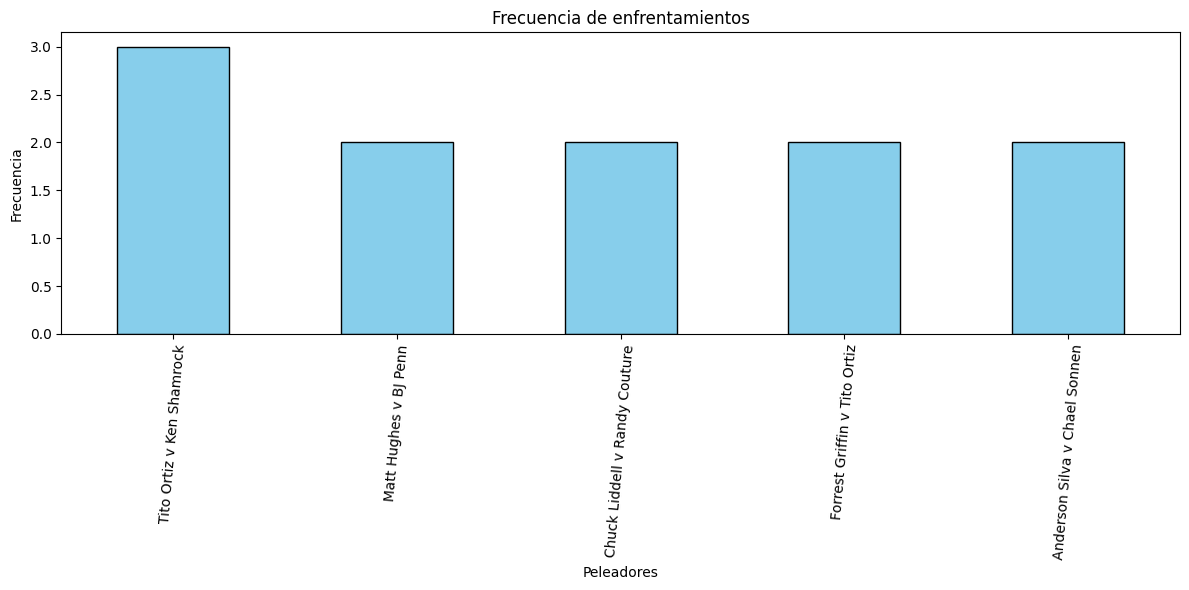

Moda en la repeticion de enfrentamientos:  0    1
Name: count, dtype: int64
Porcentajes de frecuencias:  count
1    98.522243
2     1.462523
3     0.015235
Name: proportion, dtype: float64


<Axes: ylabel='count'>

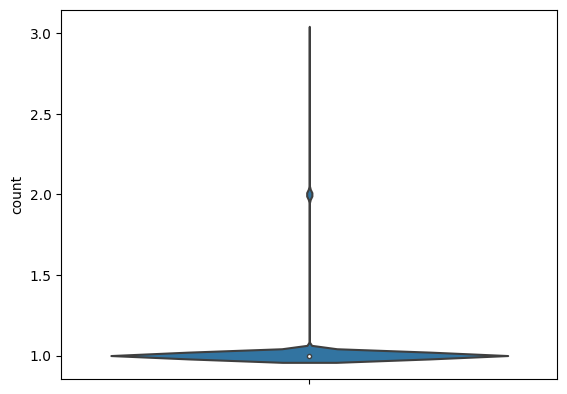

In [56]:
#Realizamos el conteo de frecuencia
fight_name_count = df['FIGHT_NAME'].value_counts()

#Tomamos los primeros 5
top_10_fight_names = fight_name_count.head(5)

#Realizamos la grafica
plt.figure(figsize=(12, 6))
top_10_fight_names.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia de enfrentamientos')
plt.xlabel('Peleadores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

#Encontramos la moda 
moda = fight_name_count.mode()
print('Moda en la repeticion de enfrentamientos: ', moda)

porcentajes = fight_name_count.value_counts(normalize=True)
print('Porcentajes de frecuencias: ', porcentajes*100)

sns.violinplot(y=fight_name_count)


### Variable FIGHT_WEIGHTCLASS
FIGHT_WEIGHTCLASS es la categoría de cada pelea, además de la división varonil y femenil existen otras divisiones por peso. Para la categoría varonil exiten 9, desde las 115 libras (peso paja) hasta 265 libras (peso pesado). Para la femenil existen unicamente 5, que van desde las 105 libras (pero átomo) hasta las 155 libras (peso ligero)

##### Interpretación
En esta ocasión lo principal es encontrar la frecuencia, al encontrarla podemos ver qué categorías abarcan más peleas.
Al graficar la frecuencia vemos que las categorías más repetidas son las categorías lightweight, welterweight, middleweight. Estas corresponden a un rango de peso de 155 a 185 libras siendo el promedio de peso de un hombre adulto, es decir, la mayoría de peleas/peleadores tienen peso promedio.



13

Index(['heavyweight', 'lightweight', 'welterweight', 'middleweight',
       'bantamweight', 'featherweight', 'flyweight', 'strawweight',
       'openweight', 'catchweight', 'ufctournamenttitle',
       'ufcsuperfightchampionship', 'ultimateultimatetournamenttitle'],
      dtype='object', name='FIGHT_WEIGHTCLASS')

array([1250, 1165,  902,  715,  651,  427,  235,   86,   51,    8,    5,
          2])

<Axes: >

Text(0.5, 1.0, 'Categorias de peleas')

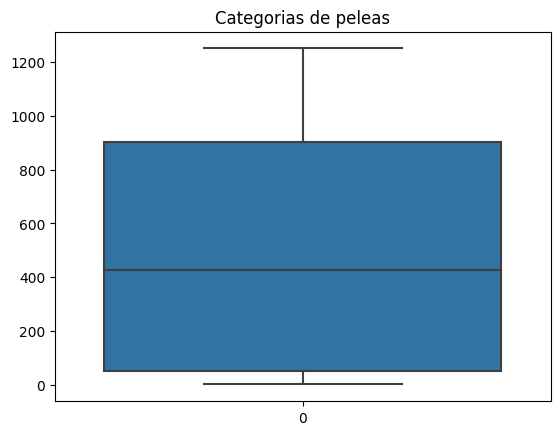

In [57]:

new_lenght = df['FIGHT_WEIGHTCLASS'].unique()
len(new_lenght)
weightClass = df['FIGHT_WEIGHTCLASS'].value_counts()
weightClass.index
weightClass.unique()
sns.boxplot(data=weightClass)
plt.title("Categorias de peleas")



<BarContainer object of 13 artists>

Text(0.5, 0, 'Categoria')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'heavyweight'),
  Text(1, 0, 'lightweight'),
  Text(2, 0, 'welterweight'),
  Text(3, 0, 'middleweight'),
  Text(4, 0, 'bantamweight'),
  Text(5, 0, 'featherweight'),
  Text(6, 0, 'flyweight'),
  Text(7, 0, 'strawweight'),
  Text(8, 0, 'openweight'),
  Text(9, 0, 'catchweight'),
  Text(10, 0, 'ufctournamenttitle'),
  Text(11, 0, 'ufcsuperfightchampionship'),
  Text(12, 0, 'ultimateultimatetournamenttitle')])

Text(0, 0.5, 'Cantidad')

Text(0.5, 1.0, 'Peleas por categoria')

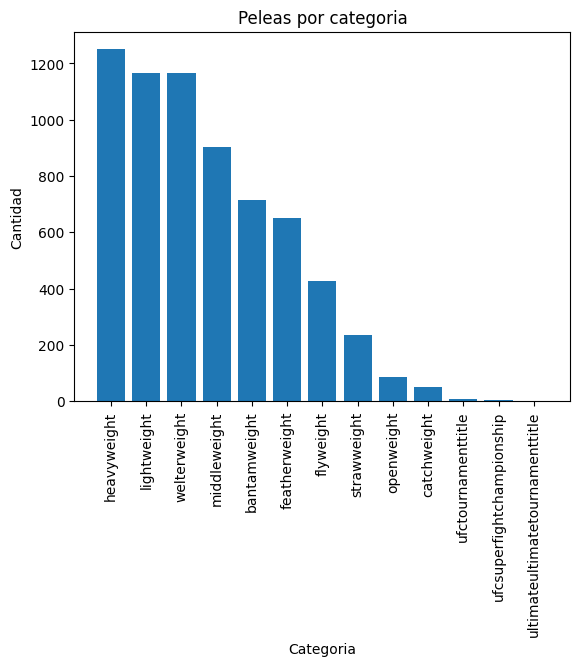

Porcentajes de peleas por evento:  FIGHT_WEIGHTCLASS
heavyweight                        18.763134
lightweight                        17.487241
welterweight                       17.487241
middleweight                       13.539478
bantamweight                       10.732513
featherweight                       9.771840
flyweight                           6.409487
strawweight                         3.527469
openweight                          1.290904
catchweight                         0.765536
ufctournamenttitle                  0.120084
ufcsuperfightchampionship           0.075053
ultimateultimatetournamenttitle     0.030021
Name: proportion, dtype: float64


<Axes: xlabel='count'>

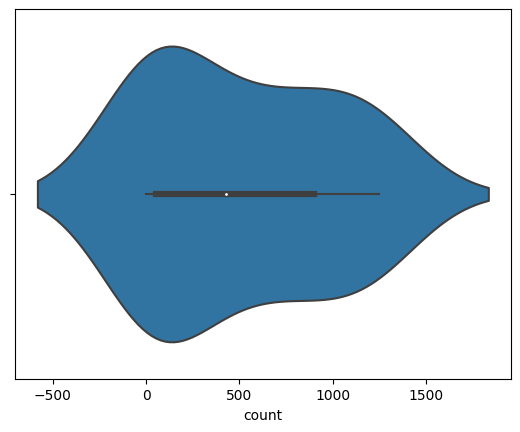

In [58]:

plt.bar(weightClass.index, weightClass.values)
plt.xlabel('Categoria')
plt.xticks(rotation=90)
plt.ylabel('Cantidad')
plt.title('Peleas por categoria')
plt.show()

# Porcentaje de peleas
porcentajes = df['FIGHT_WEIGHTCLASS'].value_counts(normalize=True)
print('Porcentajes de peleas por evento: ', porcentajes*100)

sns.violinplot(x=weightClass)


### Variable FIGHT_METHOD
FIGHT_METHOD muestra el medio por el que terminó cada pelea, es similar a FIGHT_DETAILS solo que en esa columna se desgloza más el tipo KO/TKO

##### Interpretacion
Realizamos una gráfica de frecuencia para conocer los más repetidos, y vemos que es decisión unánime (los 3 jueces votaron al mismo), el segundo es KO/TKO y el tercero summisión, esta información se podría utilizar en el ámbito de las apuestas, al inicio de cada pelea se puede dar un momio mayor o menor dependiendo de estos datos.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='FIGHT_METHOD'>

Text(0.5, 1.0, ' Frecuencia de Metodo de Pelea')

Text(0.5, 0, 'Metodo de Pelea')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Decision - Unanimous'),
  Text(1, 0, 'KO/TKO'),
  Text(2, 0, 'Submission'),
  Text(3, 0, 'Decision - Split'),
  Text(4, 0, 'Decision - Majority'),
  Text(5, 0, 'TKO - Doctor&#039;s Stoppage'),
  Text(6, 0, 'Overturned'),
  Text(7, 0, 'Could Not Continue'),
  Text(8, 0, 'DQ'),
  Text(9, 0, 'Other')])

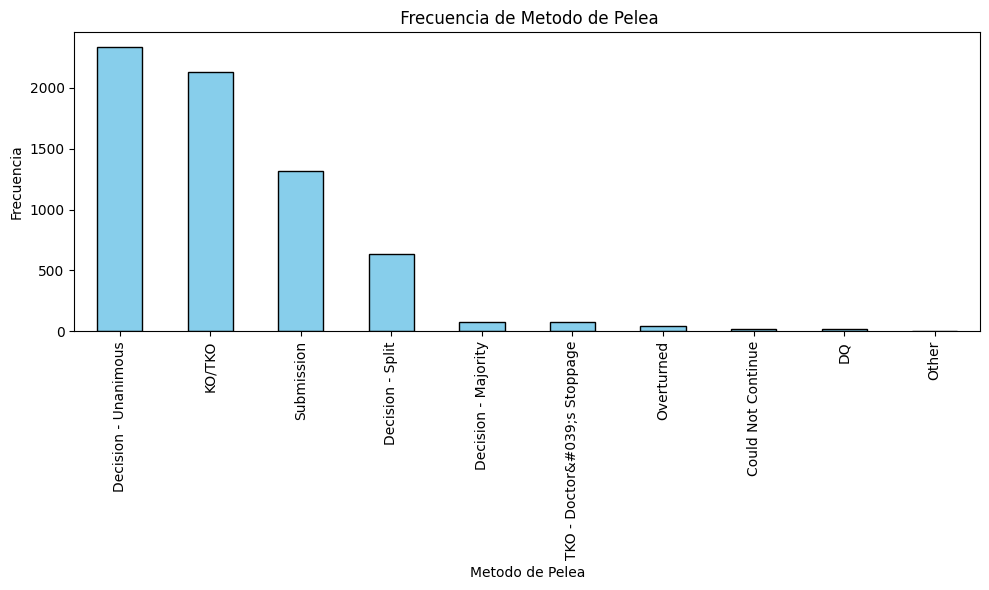

moda:  0    Decision - Unanimous
Name: FIGHT_METHOD, dtype: object
Porcentaje de decision de finalizacion:  FIGHT_METHOD
Decision - Unanimous            35.109577
KO/TKO                          31.957370
Submission                      19.813870
Decision - Split                 9.531672
Decision - Majority              1.185830
TKO - Doctor&#039;s Stoppage     1.095767
Overturned                       0.690483
Could Not Continue               0.300210
DQ                               0.270189
Other                            0.045032
Name: proportion, dtype: float64


In [59]:
fight_method_counts = df['FIGHT_METHOD'].value_counts()



plt.figure(figsize=(10, 6))
fight_method_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(' Frecuencia de Metodo de Pelea')
plt.xlabel('Metodo de Pelea')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

moda = df['FIGHT_METHOD'].mode()
print("moda: ", moda)
porcentajes = df['FIGHT_METHOD'].value_counts(normalize=True)
print('Porcentaje de decision de finalizacion: ', porcentajes*100)


<Axes: xlabel='count'>

Text(0.5, 1.0, 'Boxplot de FIGHT_METHOD')

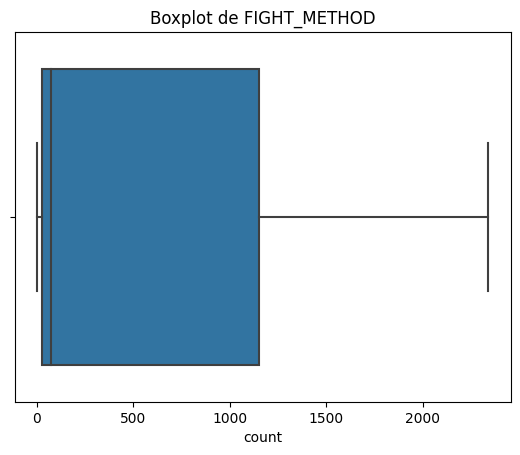

In [60]:
sns.boxplot(x=fight_method_counts )
plt.title('Boxplot de FIGHT_METHOD')


### Variable ROUND
ROUND contiene el round de finalización de las peleas, cada pelea tiene desde 1 hasta 5 rounds cada uno de 5 min.

##### Interpretación
Los resultados de la grafica de frecuencia nos dicen que el round de finalización más común, o moda, es el tercero y sorprendentemente el segundo más común es el primer round. Finalmente, al parecer en las peleas que son de 5 rounds lo más probable es que el 4to round sea de descanso o preparación para el 5to. 

<BarContainer object of 5 artists>

Text(0.5, 0, 'Numero de round')

Text(0, 0.5, 'Numero de peleas')

Text(0.5, 1.0, 'Round de finalizacion de las peleas')

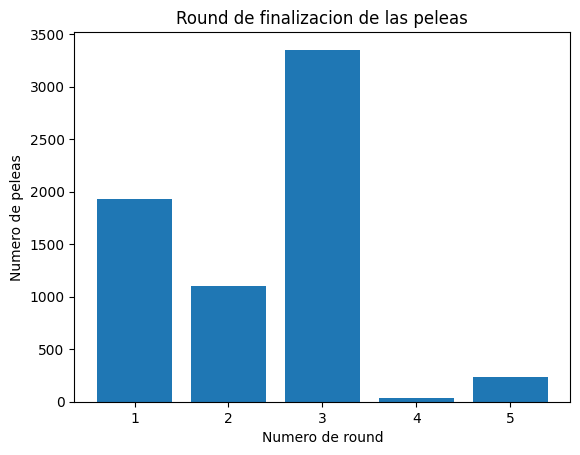

<Axes: xlabel='count'>

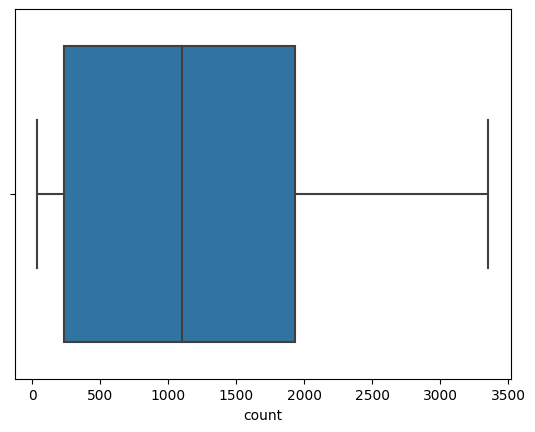

In [61]:
round = df['ROUND'].value_counts()

plt.bar(round.index, round.values)
plt.xlabel('Numero de round')
plt.ylabel('Numero de peleas')
plt.title('Round de finalizacion de las peleas')
plt.show()

sns.boxplot(x=round)

<Axes: xlabel='count'>

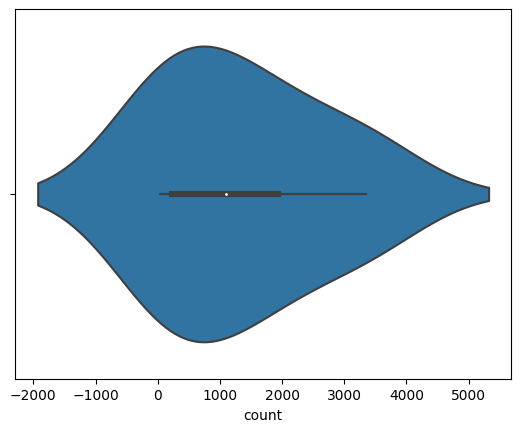

In [62]:
sns.violinplot(x=round)


##### Con el siguiente gráfico de pastel podemos ilustrar el porcentaje de cada uno y podemos ver que la mitad de las peleas terminan en el round 3 y tan solo el 1 porciento terminan en el round 4.

([<matplotlib.patches.Wedge at 0x7f8dcbc27af0>,
 [Text(-0.011411642383466493, 1.099940804960936, '3'),
  Text(-0.6560114324555428, -0.8829773499289927, '1'),
  Text(0.78275304231287, -0.7728503572813734, '2'),
  Text(1.0880393108500042, -0.16177285942038616, '5'),
  Text(1.0998233824306178, -0.019711099890033147, '4')],
 [Text(-0.00622453220916354, 0.5999677117968741, '50%'),
  Text(-0.35782441770302337, -0.4816240090521778, '29%'),
  Text(0.42695620489792907, -0.42155474033529455, '17%'),
  Text(0.5934759877363659, -0.0882397415020288, '4%'),
  Text(0.5999036631439734, -0.01075150903092717, '1%')])

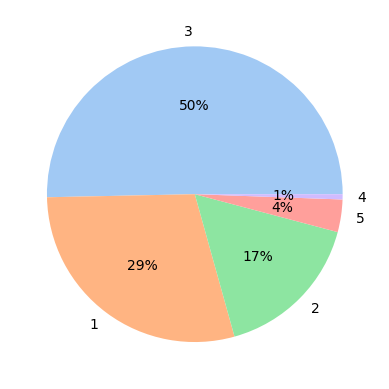

In [63]:
porcentajes = df['ROUND'].value_counts(normalize=True)
color = sns.color_palette('pastel')[0:5]
plt.pie(porcentajes, labels=df['ROUND'].unique(),colors=color, autopct='%.0f%%')
plt.show()

### Variable FIGHT_TIME_FORMAT
La variable fight_time_format nos dice el formato en el cual tomo parte la pelea.

Interpretacion:

Con la grafica generada podemos ver que en el pasar de los años el estandar de ronda en la UFC se ha convertido a 3Rnd(5-5-5) y siguiendole las peleas que cuentan con "rounds de campeonato" (dos rounds extras) por lo que tenemos en segundo lugar 5Rnd(5-5-5-5-5) y despues todos los demas siendo un poco despreciables ya que en su mayoria fueron formatos utilizados en las primeras entradas del torneo o por ocasiones especiales fuera de lo comun.

<BarContainer object of 19 artists>

Text(0.5, 0, 'Formato de pelea')

Text(0, 0.5, 'Peleas con dicho formato')

Text(0.5, 1.0, 'Formato de peleas')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '3 Rnd (5-5-5)'),
  Text(1, 0, '5 Rnd (5-5-5-5-5)'),
  Text(2, 0, '1 Rnd + OT (12-3)'),
  Text(3, 0, 'No Time Limit'),
  Text(4, 0, '3 Rnd + OT (5-5-5-5)'),
  Text(5, 0, '1 Rnd (20)'),
  Text(6, 0, '1 Rnd + 2OT (15-3-3)'),
  Text(7, 0, '2 Rnd (5-5)'),
  Text(8, 0, '1 Rnd (15)'),
  Text(9, 0, '1 Rnd (10)'),
  Text(10, 0, '1 Rnd (12)'),
  Text(11, 0, '1 Rnd + OT (30-5)'),
  Text(12, 0, '1 Rnd (18)'),
  Text(13, 0, '1 Rnd + OT (15-3)'),
  Text(14, 0, '1 Rnd + OT (27-3)'),
  Text(15, 0, '1 Rnd + OT (30-3)'),
  Text(16, 0, '1 Rnd + OT (31-5)'),
  Text(17, 0, '1 Rnd + 2OT (24-3-3)'),
  Text(18, 0, '1 Rnd (30)')])

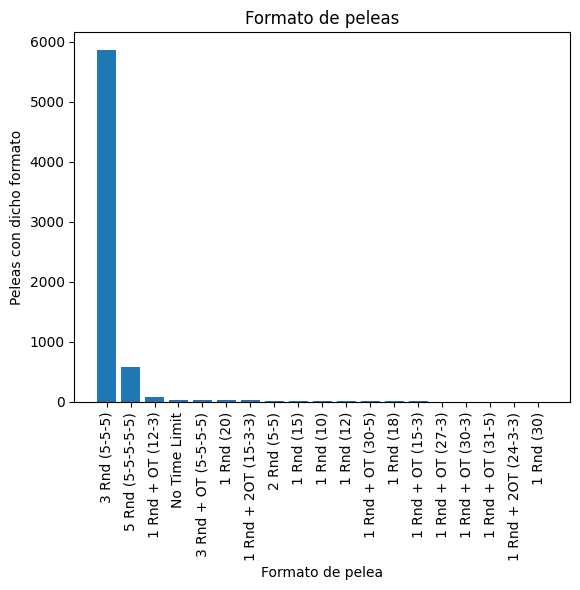

In [64]:
# Si sale en la grafica es que al menos aparece una vez en el dataset
fightFormat = df['FIGHT_TIME_FORMAT'].value_counts()

plt.bar(fightFormat.index, fightFormat.values)
plt.xlabel('Formato de pelea')
plt.ylabel('Peleas con dicho formato')
plt.title('Formato de peleas')
plt.xticks(rotation=90)

plt.show()

### Variable Time
Minuto de finalización de las peleas

Justificacion:

Aunque en la grafica los valores aparezcan un poco aleatorios ya que la distribucion de cuando acaba una pelea solo muestra como moda que es un poco menos probable que acabe entre los 170 y 200 segundos, el ligar estos tiempos con las peleas pasadas de un peleador nos puede indicar con una buena certeza cual es el tiempo esperado de su propio combate al ser comparado con los de su oponente.

(array([ 87., 148., 182., 159., 188., 198., 165., 210., 192., 185., 198.,
        206., 170., 151., 164., 151., 159., 195., 191., 218.]),
 array([  5. ,  19.7,  34.4,  49.1,  63.8,  78.5,  93.2, 107.9, 122.6,
        137.3, 152. , 166.7, 181.4, 196.1, 210.8, 225.5, 240.2, 254.9,
        269.6, 284.3, 299. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Tiempo en segundos')

Text(0, 0.5, 'Número de peleas')

Text(0.5, 1.0, 'Distribución de Tiempos de Peleas (Excluyendo >= 300 segundos)')

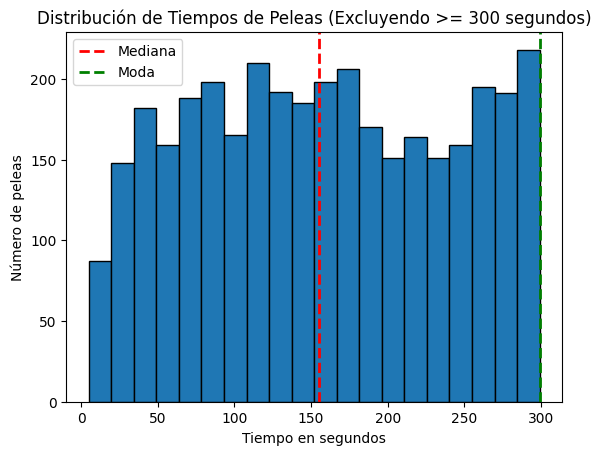

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya has realizado la conversión de 'TIME' a segundos y calculado las estadísticas
# Si no lo has hecho, asegúrate de ejecutar el código que proporcionaste antes.

# Aplica un filtro para excluir los tiempos mayores o iguales a 300 segundos
filtered_times = df[df['TIME'] < 300]['TIME']

# Crear un histograma de los tiempos filtrados en segundos
plt.hist(filtered_times, bins=20, edgecolor='k')  # Puedes ajustar el número de bins según tu preferencia
plt.xlabel('Tiempo en segundos')
plt.ylabel('Número de peleas')
plt.title('Distribución de Tiempos de Peleas (Excluyendo >= 300 segundos)')
plt.axvline(filtered_times.median(), color='r', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(filtered_times.mode().values[0], color='g', linestyle='dashed', linewidth=2, label='Moda')
plt.legend()
plt.show()


### Variable FIGHT_REFEREE
Que referees han sido historicamente los que mas han tenido peleas

Justificacion: 

Podemos observar los referees que cuenten con el mayor numero de peleas, a su vez podemos determinar si un referee es mas probable a que sus peleas terminen en descalificacion o que cuente con una tendencia de detener peleas en los primeros rounds para indicar una menor posibilidad de que se vaya a la distancia la pelea.

<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Herb Dean'),
  Text(1, 0, 'John McCarthy'),
  Text(2, 0, 'Dan Miragliotta'),
  Text(3, 0, 'Mario Yamasaki'),
  Text(4, 0, 'Marc Goddard'),
  Text(5, 0, 'Chris Tognoni'),
  Text(6, 0, 'Yves Lavigne'),
  Text(7, 0, 'Keith Peterson'),
  Text(8, 0, 'Jason Herzog'),
  Text(9, 0, 'Mark Smith')])

Text(0.5, 0, 'Nombre')

Text(0, 0.5, 'Peleas arbitradas')

Text(0.5, 1.0, 'Arbitros con mas peleas')

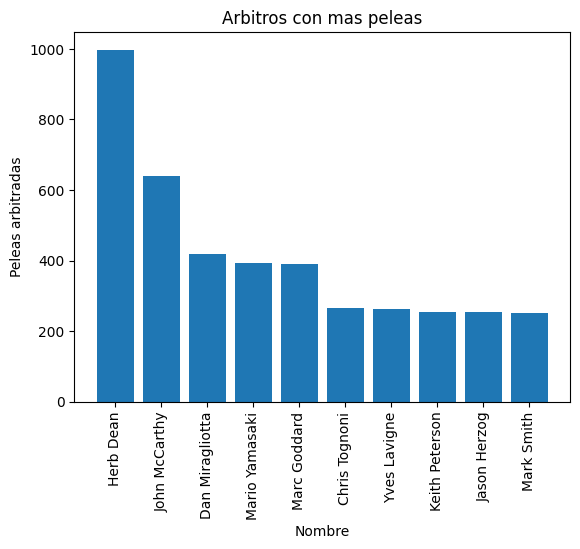

In [66]:
frecuencia = df['FIGHT_REFEREE'].value_counts()
top10Winners = frecuencia.head(10)

plt.bar(top10Winners.index, top10Winners.values)
plt.xticks(rotation=90)

plt.xlabel('Nombre')
plt.ylabel('Peleas arbitradas')
plt.title('Arbitros con mas peleas')

plt.show()

### Variable FIGHT_DETAILS
Nos indica mas informacion sobre acabo la pelea que FIGHT_METHOD/

Justificacion:

La variable fight_details nos proporcina el tipo de finish utilizado por el peleador, por lo que es una de nuestras variables mas valiosas en combinacion con fight_method ya que asi podemos discernir si un peleador usualmente termina sus peleas por knockout o por decision y del otro lado si un peleador es suceptible a ser terminado por KO, submission o usualmente llega a decision. 

<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Decision'),
  Text(1, 0, 'Decision - Split'),
  Text(2, 0, 'Punch to Head At Distance'),
  Text(3, 0, 'Rear Naked Choke'),
  Text(4, 0, 'Punches to Head At Distance'),
  Text(5, 0, 'Punches to Head On Ground'),
  Text(6, 0, 'Punch to Head In Clinch'),
  Text(7, 0, 'Kick to Head At Distance'),
  Text(8, 0, 'Punches to Head From Mount'),
  Text(9, 0, 'Punches to Head From Back Control')])

Text(0.5, 0, 'Tipo de victoria')

Text(0, 0.5, 'Cantidad')

Text(0.5, 1.0, 'Victorias mas comunes')

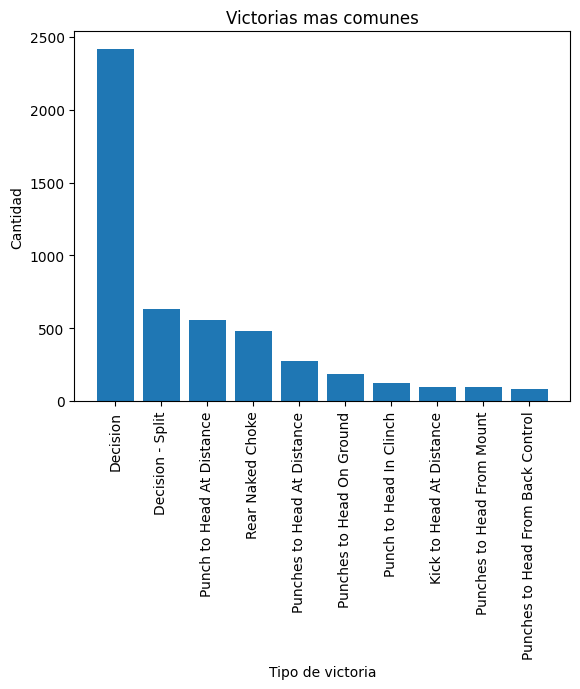

In [67]:
fightDetails = df['FIGHT_DETAILS'].value_counts()
topFightEndUp = fightDetails.head(10)
plt.bar(topFightEndUp.index, topFightEndUp.values)
plt.xticks(rotation=90)

plt.xlabel('Tipo de victoria')
plt.ylabel('Cantidad')
plt.title('Victorias mas comunes')

plt.show()

### Variable Event_Date

El análisis de EVENT_DATE es esencial ya que nos permite comprender la distribución de los eventos a lo largo del tiempo. Ayuda a identificar patrones relacionados con la programación de eventos, la estacionalidad y las tendencias históricas en los eventos de UFC. Esta información es valiosa para la planificación y la comprensión de la evolución temporal de los eventos. Dentro del análisis, podemos observar que las fechas con mayor frecuencia caen entre finales de mayo y mediados de noviembre. El porcentaje de eventos que ocurren en este periodo varía entre 0.31 y 0.39 del total de las 609 fechas disponibles. La fecha "November 19, 2016" es la moda, ya que apareció 25 veces en el conjunto de datos.


In [76]:
import pandas as pd


event_name_counts = df['EVENT_DATE'].value_counts()
event_name_percentage = (event_name_counts / len(df)) * 100
mode_event_name = event_name_counts.idxmax()
unique_event_name_count = len(event_name_counts)
missing_values = df['EVENT_DATE'].isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("Frequency Distribution:")
print(event_name_counts)
print("\nPercentage Distribution:")
print(event_name_percentage)
print("\nMode:")
print(mode_event_name)
print("\nCount of Unique Categories:")
print(unique_event_name_count)
print("\nMissing Values:")
print(f"Count: {missing_values}, Percentage: {missing_percentage}%")


Frequency Distribution:
EVENT_DATE
2016-11-19    25
2014-10-04    23
2014-05-31    22
2014-08-23    21
2014-06-28    21
              ..
2002-06-22     6
1994-09-09     6
2000-04-14     6
2022-05-07     6
1998-03-13     6
Name: count, Length: 609, dtype: int64

Percentage Distribution:
EVENT_DATE
2016-11-19    0.375263
2014-10-04    0.345242
2014-05-31    0.330231
2014-08-23    0.315221
2014-06-28    0.315221
                ...   
2002-06-22    0.090063
1994-09-09    0.090063
2000-04-14    0.090063
2022-05-07    0.090063
1998-03-13    0.090063
Name: count, Length: 609, dtype: float64

Mode:
2016-11-19 00:00:00

Count of Unique Categories:
609

Missing Values:
Count: 0, Percentage: 0.0%


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='YearMonth'>

Text(0.5, 1.0, 'Top 10 Months with the Most Events')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Event Frequency')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2016-07'),
  Text(1, 0, '2016-11'),
  Text(2, 0, '2018-11'),
  Text(3, 0, '2019-03'),
  Text(4, 0, '2018-07'),
  Text(5, 0, '2017-07'),
  Text(6, 0, '2016-12'),
  Text(7, 0, '2021-10'),
  Text(8, 0, '2017-12'),
  Text(9, 0, '2015-07')])

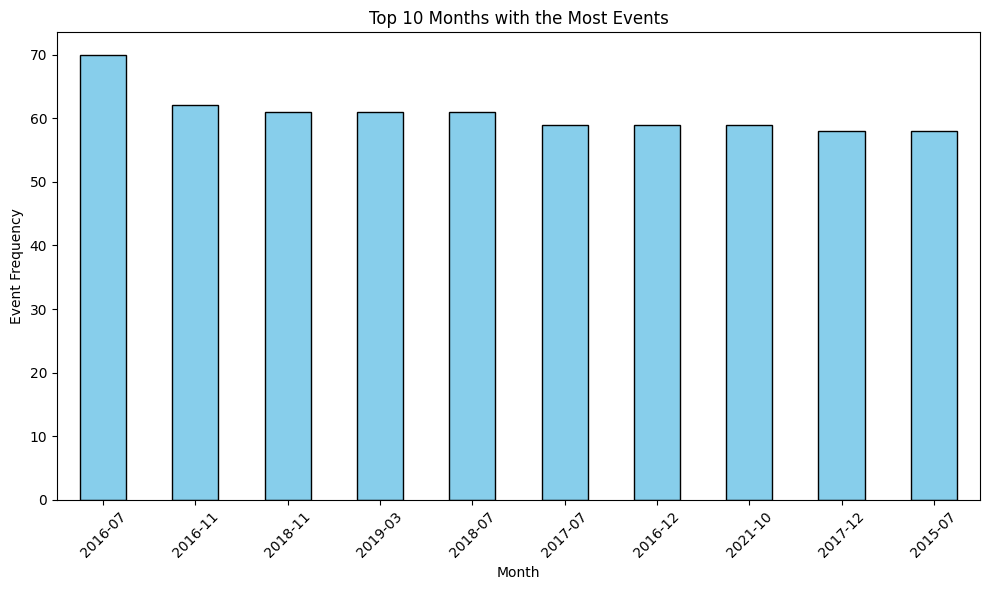

<Axes: ylabel='count'>

Text(0.5, 1.0, 'Boxplot of Events for Top 10 Months')

Text(0, 0.5, 'Event Frequency')

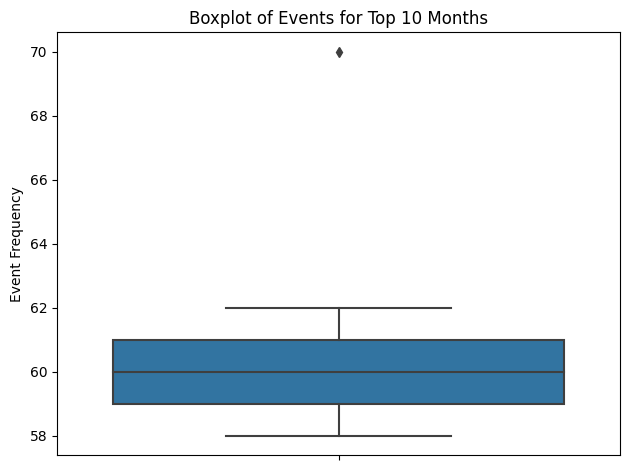

In [93]:
import matplotlib.pyplot as plt
import pandas as pd


df['EVENT_DATE'] = pd.to_datetime(df['EVENT_DATE'])
df['YearMonth'] = df['EVENT_DATE'].dt.to_period('M')
event_counts = df['YearMonth'].value_counts()
top_10_event_months = event_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_event_months.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Months with the Most Events')
plt.xlabel('Month')
plt.ylabel('Event Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.boxplot(y=top_10_event_months)
plt.title('Boxplot of Events for Top 10 Months')
plt.ylabel('Event Frequency')
plt.tight_layout()
plt.show()




### Variable EVENT_LOCATION
EVENT_LOCATION es importante ya que nos brinda información sobre dónde se celebran los eventos de UFC. Puede revelar qué lugares se eligen con mayor frecuencia para los eventos y puede tener implicaciones en la planificación logística y en la comprensión de la difusión global del deporte. Este análisis proporciona una visión geográfica de la distribución de los eventos. odemos observar que la ubicación con mayor frecuencia es Las Vegas, como si no fuera una sorpresa, y se lleva el récord con 2044 eventos. De los 168 lugares únicos que existen en el dataset, tiene un porcentaje de distribución del 30.68%, lo que equivale a aproximadamente una tercera parte del total.

In [79]:

import pandas as pd

event_location_counts = df['EVENT_LOCATION'].value_counts()
event_location_percentage = (event_location_counts / len(df)) * 100
mode_event_location = event_location_counts.idxmax()
unique_event_location_count = len(event_location_counts)
missing_values = df['EVENT_LOCATION'].isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("Frequency Distribution:")
print(event_location_counts)
print("\nPercentage Distribution:")
print(event_location_percentage)
print("\nMode:")
print(mode_event_location)
print("\nCount of Unique Categories:")
print(unique_event_location_count)
print("\nMissing Values:")
print(f"Count: {missing_values}, Percentage: {missing_percentage}%")


Frequency Distribution:
EVENT_LOCATION
Las Vegas, Nevada, USA                        2044
Abu Dhabi, Abu Dhabi, United Arab Emirates     180
London, England, United Kingdom                125
Anaheim, California, USA                        95
Houston, Texas, USA                             94
                                              ... 
Casper, Wyoming, USA                             8
Miami, Florida, USA                              8
Chiba, Japan                                     7
Dothan, Alabama, USA                             7
Yokohama, Kanagawa, Japan                        6
Name: count, Length: 168, dtype: int64

Percentage Distribution:
EVENT_LOCATION
Las Vegas, Nevada, USA                        30.681477
Abu Dhabi, Abu Dhabi, United Arab Emirates     2.701891
London, England, United Kingdom                1.876313
Anaheim, California, USA                       1.425998
Houston, Texas, USA                            1.410988
                                        

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='EVENT_LOCATION'>

Text(0.5, 1.0, 'Top 10 locaciones de eventos ')

Text(0.5, 0, 'Locacion de evento')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Las Vegas, Nevada, USA'),
  Text(1, 0, 'Abu Dhabi, Abu Dhabi, United Arab Emirates'),
  Text(2, 0, 'London, England, United Kingdom'),
  Text(3, 0, 'Anaheim, California, USA'),
  Text(4, 0, 'Houston, Texas, USA'),
  Text(5, 0, 'Newark, New Jersey, USA'),
  Text(6, 0, 'Chicago, Illinois, USA'),
  Text(7, 0, 'Montreal, Quebec, Canada'),
  Text(8, 0, 'Los Angeles, California, USA'),
  Text(9, 0, 'Atlantic City, New Jersey, USA')])

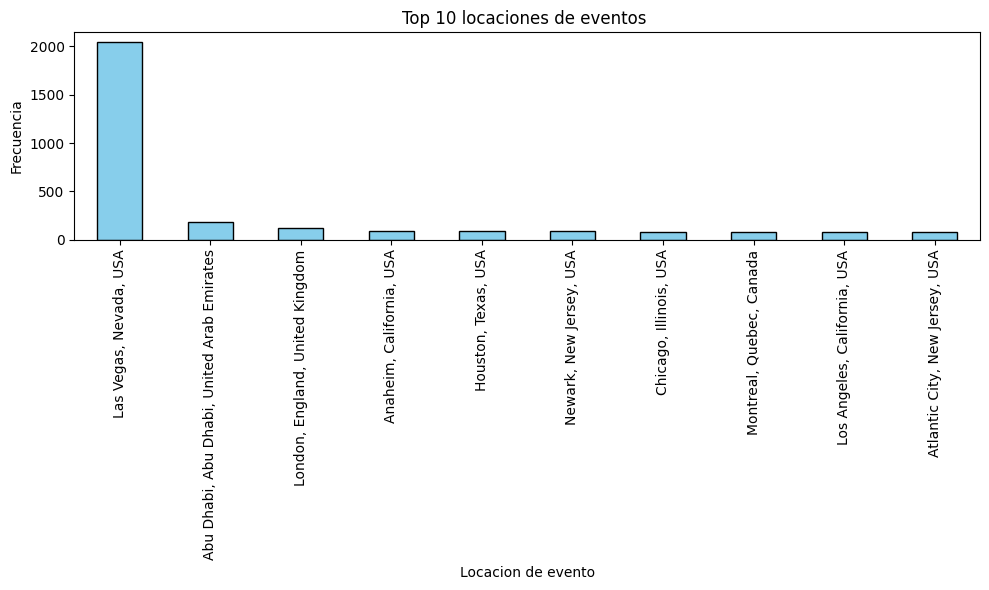

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='EVENT_LOCATION'>

Text(0.5, 1.0, 'Top 10 Event Locations by Percentage')

Text(0.5, 0, 'Event Location')

Text(0, 0.5, 'Percentage')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Las Vegas, Nevada, USA'),
  Text(1, 0, 'Abu Dhabi, Abu Dhabi, United Arab Emirates'),
  Text(2, 0, 'London, England, United Kingdom'),
  Text(3, 0, 'Anaheim, California, USA'),
  Text(4, 0, 'Houston, Texas, USA'),
  Text(5, 0, 'Newark, New Jersey, USA'),
  Text(6, 0, 'Chicago, Illinois, USA'),
  Text(7, 0, 'Montreal, Quebec, Canada'),
  Text(8, 0, 'Los Angeles, California, USA'),
  Text(9, 0, 'Atlantic City, New Jersey, USA')])

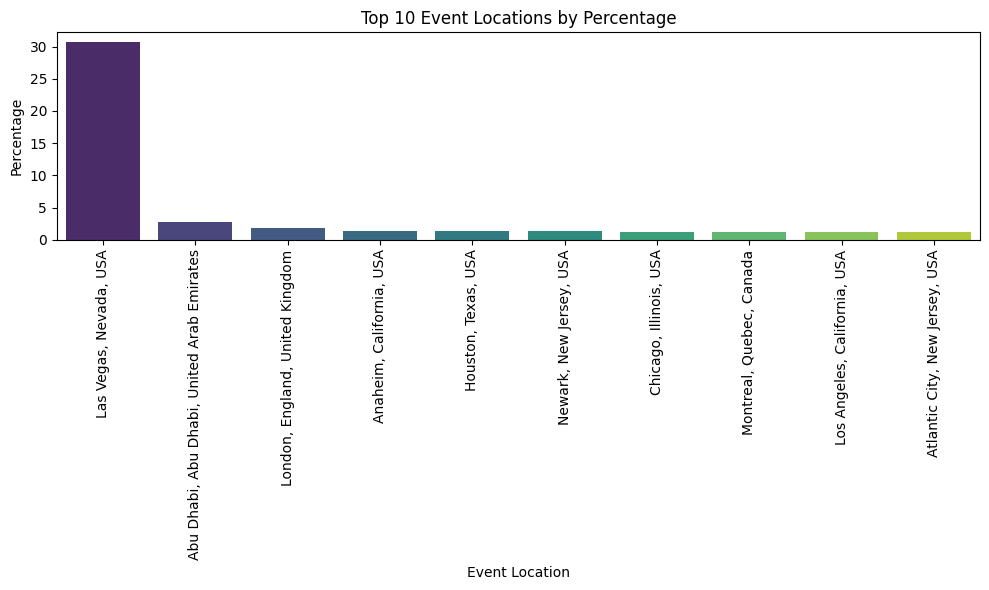

In [105]:
import matplotlib.pyplot as plt

event_location = df['EVENT_LOCATION'].value_counts()

top_10_event_location = event_location.head(10)

plt.figure(figsize=(10, 6))
top_10_event_location.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 locaciones de eventos ')
plt.xlabel('Locacion de evento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



top_10_event_locations = event_location_percentage.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_event_locations.index, y=top_10_event_locations.values, palette='viridis')
plt.title('Porcentaje de evento')
plt.xlabel('Locacion del evento')
plt.ylabel('Porcentaje')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



### Variable FIGHT_WINNER
FIGHT_WINNER es fundamental, ya que nos permite identificar qué luchadores tienen más victorias en el conjunto de datos. Esta información es valiosa para reconocer a los luchadores más exitosos y puede ser de interés para fanáticos, promotores y analistas. Permite identificar a los luchadores más destacados en términos de victorias. Los peleadores con mas frequencia en esta variable con Jim Miller y Donald Cerrone con 23. El top 5 estan muy cerca, vana de 21 a 23 y su porcentaje va de 0.31 a 0.34 que es impresionante porque hay 1583 categorias unicas. 

In [81]:
import pandas as pd

fight_winner_counts = df['FIGHT_WINNER'].value_counts()
fight_winner_percentage = (fight_winner_counts / len(df)) * 100
mode_fight_winner = fight_winner_counts.idxmax()
unique_fight_winner_count = len(fight_winner_counts)
missing_values = df['FIGHT_WINNER'].isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("Frequency Distribution:")
print(fight_winner_counts)
print("\nPercentage Distribution:")
print(fight_winner_percentage)
print("\nMode:")
print(mode_fight_winner)
print("\nCount of Unique Categories:")
print(unique_fight_winner_count)
print("\nMissing Values:")
print(f"Count: {missing_values}, Percentage: {missing_percentage}%")

Frequency Distribution:
FIGHT_WINNER
Jim Miller           23
Donald Cerrone       23
Demian Maia          22
Charles Oliveira     22
Jon Jones            21
                     ..
Renato Verissimo      1
Per Eklund            1
Mike Ciesnolevicz     1
Michihiro Omigawa     1
Shane Campbell        1
Name: count, Length: 1583, dtype: int64

Percentage Distribution:
FIGHT_WINNER
Jim Miller           0.345242
Donald Cerrone       0.345242
Demian Maia          0.330231
Charles Oliveira     0.330231
Jon Jones            0.315221
                       ...   
Renato Verissimo     0.015011
Per Eklund           0.015011
Mike Ciesnolevicz    0.015011
Michihiro Omigawa    0.015011
Shane Campbell       0.015011
Name: count, Length: 1583, dtype: float64

Mode:
Jim Miller

Count of Unique Categories:
1583

Missing Values:
Count: 0, Percentage: 0.0%


<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Jim Miller'),
  Text(1, 0, 'Donald Cerrone'),
  Text(2, 0, 'Demian Maia'),
  Text(3, 0, 'Charles Oliveira'),
  Text(4, 0, 'Jon Jones'),
  Text(5, 0, 'Andrei Arlovski'),
  Text(6, 0, 'Rafael Dos Anjos'),
  Text(7, 0, 'Dustin Poirier'),
  Text(8, 0, 'Michael Bisping'),
  Text(9, 0, 'Georges St-Pierre')])

Text(0.5, 0, 'Nombre')

Text(0, 0.5, 'Numero de peleas')

Text(0.5, 1.0, 'Peleadores con mas victorias')

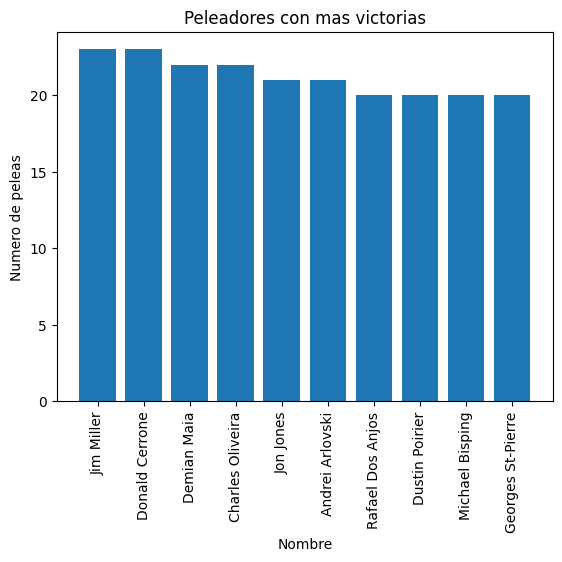

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Wins'>

Text(0.5, 1.0, 'Violin Plot of Wins for Fighters')

Text(0.5, 0, 'Number of Wins')

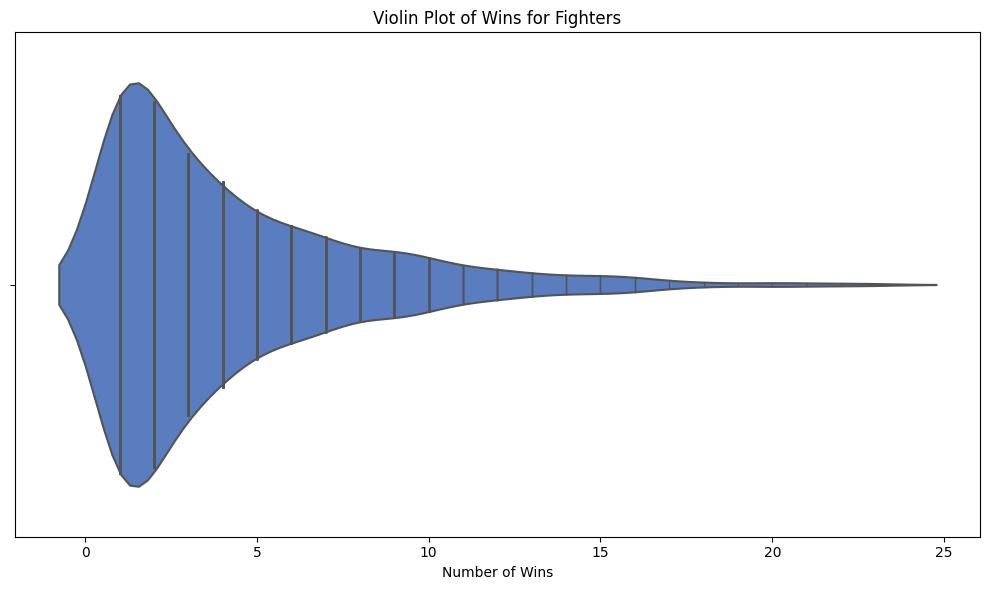

In [102]:
winnerFrequency = df['FIGHT_WINNER'].value_counts()
top_10_modas = winnerFrequency.head(10)

plt.bar(top_10_modas.index, top_10_modas.values)
plt.xticks(rotation=90)
plt.xlabel('Nombre')
plt.ylabel('Numero de peleas')
plt.title('Peleadores con mas victorias')

plt.show()

winner_frequency = df['FIGHT_WINNER'].value_counts()

# Create a DataFrame with the winners and their win counts
winners_df = pd.DataFrame({'Fighter': winner_frequency.index, 'Wins': winner_frequency.values})

plt.figure(figsize=(10, 6))
sns.violinplot(x=winners_df['Wins'], palette="muted", inner="stick")
plt.title('Violin Plot of Wins for Fighters')
plt.xlabel('Number of Wins')
plt.tight_layout()
plt.show()




